In [1]:
# Audio Processing
import scipy.signal as sig
import scipy.io.wavfile as wav
import numpy as np
from pydub import AudioSegment

# Fma tools
#    utils will load .env: dotenv.load_dotenv(dotenv.find_dotenv())
import external.fma_utils as fma_utils

# general
import matplotlib.pyplot as plt
import IPython.display as ipd
import os
import random

# Environment vars
AUDIO_DIR should be set to the unzipped fma tracks data folder. ex. ~/fma-stft/data/fma_small

METADATA_DIR should be set to the unzipped fma metadata. ex. ~/fma-stft/data/fma_metadata

In [2]:
AUDIO_DIR = os.environ.get('AUDIO_DIR')
METADATA_DIR = os.environ.get('METADATA_DIR')

print("Audio Dir: {}\nMetadata Dir: {}".format(AUDIO_DIR,METADATA_DIR))

Audio Dir: /home/actlab/mark/fma-stft/data/fma_small
Metadata Dir: /home/actlab/mark/fma-stft/data/fma_metadata


# Get genre-based subsets

Get tracks that are in the 'small' subset and that have genres 'Instrumental' and 'Electronic'

In [3]:
# Load all tracks (might take a few seconds)
tracks = fma_utils.load(os.path.join(METADATA_DIR, 'tracks.csv'))

# Get 'small' subset
small = tracks['set', 'subset'] <= 'small'
tracks_small = tracks[small] # dataframe with only 'small' subset tracks

# 'Instrumental' genre
instrumental = tracks_small['track','genre_top'] == 'Instrumental'
instrumental_tracks = tracks_small[instrumental] #only 'small' subset tracks that are also 'instrumental'

# 'Electronic' genre
electronic = tracks_small['track', 'genre_top'] == 'Electronic'
electronic_tracks = tracks_small[electronic]

print("Instrumental dataframe: ")
ipd.display(instrumental_tracks['track'].head())
print("Electronic dataframe: ")
ipd.display(electronic_tracks['track'].head())

/home/actlab/mark/fma-stft/fma/utils.py:213: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  'category', categories=SUBSETS, ordered=True)


Instrumental dataframe: 


bit_rate  comments composer        date_created date_recorded  \
track_id                                                                  
10250       256000         0      NaN 2009-04-09 07:19:43           NaT   
11638       160000         0      NaN 2009-04-28 07:44:13    2010-09-29   
14568       320000         0      NaN 2009-06-06 09:47:46           NaT   
14569       320000         0      NaN 2009-06-06 09:47:56           NaT   
14570       320000         0      NaN 2009-06-06 09:48:01           NaT   

          duration  favorites     genre_top      genres       genres_all  \
track_id                                                                   
10250           76          1  Instrumental       [538]  [538, 18, 1235]   
11638          155          1  Instrumental       [538]  [538, 18, 1235]   
14568          105         12  Instrumental  [18, 1235]       [18, 1235]   
14569          406         22  Instrumental  [18, 1235]       [18, 1235]   
14570           71          4  Instrumental  [18, 1235]       [18, 1235]   

         information  interest language_code  \
track_id                                       
10250            NaN      7400            en   
11638            NaN      3620            en   
14568            NaN     15064            en   
14569            NaN     12282            en   
14570            NaN      7371            en   

                                                    license  listens lyricist  \
track_id                                                                        
10250     Attribution-Noncommercial-No Derivative Works ...     6577      NaN   
11638     Attribution-Noncommercial-Share Alike 3.0 Unit...     1460      NaN   
14568     Attribution-Noncommercial-Share Alike 2.0 UK: ...    11214      NaN   
14569     Attribution-Noncommercial-Share Alike 2.0 UK: ...     6319      NaN   
14570     Attribution-Noncommercial-Share Alike 2.0 UK: ...     3850      NaN   

          number publisher tags                 title  
track_id                                               
10250          0       NaN   []         Tree Symphony  
11638         13       NaN   []  Romantic Neck Tattoo  
14568          1       NaN   []          Monkey Dance  
14569          2       NaN   []      Gretchen's Tango  
14570          3       NaN   []     So Wunsch Ich Dir

Electronic dataframe: 


bit_rate  comments composer        date_created date_recorded  \
track_id                                                                  
1482        256000         0      NaN 2008-11-26 03:00:45    2008-11-26   
3573        256000         0      NaN 2008-12-04 19:58:19    2003-07-23   
4519        256000         0      NaN 2008-12-04 21:21:24    2008-10-24   
4520        256000         0      NaN 2008-12-04 21:21:26    2008-10-24   
4521        256000         0      NaN 2008-12-04 21:21:29    2008-10-24   

          duration  favorites   genre_top genres genres_all  \
track_id                                                      
1482           216          7  Electronic   [15]       [15]   
3573           235         15  Electronic   [15]       [15]   
4519           117         13  Electronic   [15]       [15]   
4520           199         25  Electronic   [15]       [15]   
4521           184          9  Electronic   [15]       [15]   

                                                information  interest  \
track_id                                                                
1482                                                    NaN     93276   
3573      <p><span style="margin: 0pt 5px; float: left;"...      7512   
4519      <p><span style="font-family: Verdana,Geneva,Ar...     33081   
4520      <p><span style="font-family: Verdana,Geneva,Ar...     22786   
4521      <p><span style="font-family: Verdana,Geneva,Ar...     24779   

         language_code                                            license  \
track_id                                                                    
1482                en  Attribution-Noncommercial-Share Alike 3.0 Unit...   
3573                en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
4519                en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
4520                en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   
4521                en  Attribution-NonCommercial-ShareAlike 3.0 Inter...   

          listens lyricist  number publisher tags                       title  
track_id                                                                       
1482        77299      NaN       2       NaN   []              Reindeer Dance  
3573         6678      NaN      19       NaN   []                     Piggled  
4519        28728      NaN       1       NaN   []                      Golden  
4520        18365      NaN       2       NaN   []  From Stardust to Sentience  
4521        23431      NaN       3       NaN   []                       Namer

## Optional: Save subset .csv s for faster loading in the future
This isn't used in this notebook, it just might be useful for other purposes

In [4]:
tracks_small.to_csv(os.path.join(METADATA_DIR,'tracks_small.csv'))
instrumental_tracks.to_csv(os.path.join(METADATA_DIR,'tracks_small_instrumental.csv'))
electronic_tracks.to_csv(os.path.join(METADATA_DIR,'tracks_small_electronic.csv'))

# Create file list from subsets
The index values from the dataframes in the last section coorespond to the filenames of the actual audio files. This section creats a list of filepaths for loading them

In [5]:
def audio_paths_from_indices(index):
    paths = []
    for i in range(index.size):
        # tracks are seperated into folders of 1000 songs ordered sequentially
        folder_num = index[i] // 1000
        # folder/file names are 3/6 digits respectively padded with 0
        paths.append(os.path.join(AUDIO_DIR, "{:03}/{:06}.mp3".format(folder_num,index[i])))
    return paths

In [6]:
# get index values
instrumental_index = instrumental_tracks.index.values
electronic_index = electronic_tracks.index.values

# The fma_small subset is genre-balanced, there should be ~1000 of each
print("# Instrumental Tracks: {}\n# Electronic Tracks: {}".format(instrumental_index.size,electronic_index.size))

# generate file lists
instrumental_paths = audio_paths_from_indices(instrumental_index)
electronic_paths = audio_paths_from_indices(electronic_index)

print("Instrumental songs: ")
ipd.display(instrumental_paths[:5])
print("Electronic songs: ")
ipd.display(electronic_paths[:5])

# Instrumental Tracks: 1000
# Electronic Tracks: 1000
Instrumental songs: 


['/home/actlab/mark/fma-stft/data/fma_small/010/010250.mp3',
 '/home/actlab/mark/fma-stft/data/fma_small/011/011638.mp3',
 '/home/actlab/mark/fma-stft/data/fma_small/014/014568.mp3',
 '/home/actlab/mark/fma-stft/data/fma_small/014/014569.mp3',
 '/home/actlab/mark/fma-stft/data/fma_small/014/014570.mp3']

Electronic songs: 


['/home/actlab/mark/fma-stft/data/fma_small/001/001482.mp3',
 '/home/actlab/mark/fma-stft/data/fma_small/003/003573.mp3',
 '/home/actlab/mark/fma-stft/data/fma_small/004/004519.mp3',
 '/home/actlab/mark/fma-stft/data/fma_small/004/004520.mp3',
 '/home/actlab/mark/fma-stft/data/fma_small/004/004521.mp3']

# Create STFTs from files

Now we can calculate short time fourier transforms and create spectrograms 

### Stft Function

The following function makes use of scipy.signal.stft with mostly default arguments. Default arguments might not be appropriate.

Information on stft resolution (under "Resolution Issues")
https://en.wikipedia.org/wiki/Short-time_Fourier_transform

Information on scipy stft
https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.signal.stft.html

In [7]:
#  Input:
#    audio_segment: pydub mp3 AudioSegment
#    t_start,t_stop: time in seconds to start and stop stft calculation
#  Output:
#    sample: mono-channel waveform for computed stft
#    freq: frequency bins of stft (y axis of spectrogram)  
#    time: time steps of stft (x axis of spectrogram) 
#    Zxx: stft of audio signal (2d complex array of shape (f.size,t.size)) 
#  Notes:
#     There's no error checking in here. Make sure t_start and t_stop make sense for audio file
#     fma_small consists of audio samples of 30s. Incomplete stft if audio has more than 2 channels
def mono_stft(audio_segment, t_start = 0, t_stop = 10):
    #convert raw audio data to numpy array
    raw_data = np.fromstring(audio_segment.raw_data, np.int16)
    sample = raw_data
    #convert to mono if stereo
    if (audio_segment.channels == 2):
        #raw data is interleaved channels [amp1 amp2 amp1 amp2....]
        sample = np.array([raw_data[0::2].copy(), raw_data[1::2].copy()]).transpose()
        sample = (sample[:, 0] / 2 + sample[:, 1] / 2).astype(np.int16)
    #else just use the first channel (could improve for multi-channel audio)
    else:
        sample = np.array([raw_data[0::audio_segment.channels].copy()]).transpose()
    
    #sample rate (Hz)
    sr = audio_segment.frame_rate
    #get audio from time bounds
    sample = sample[(t_start*sr):(t_stop*sr)]
    #stft
    freq, time, Zxx = sig.stft(sample, sr)
    return sample,freq,time,Zxx

### STFT from FMA data

In [8]:
# Random song from instrumental, electronic genres
inst_song = instrumental_paths[5]
elec_song = electronic_paths[111]

# Load songs
inst_audio = AudioSegment.from_mp3(inst_song)
elec_audio = AudioSegment.from_mp3(elec_song)

# Stft
inst_wav, inst_freq,inst_time,inst_Zxx = mono_stft(inst_audio)
elec_wav, elec_freq,elec_time,elec_Zxx = mono_stft(elec_audio)

# Data shape (should be the same for both!)
print("Data Shape:\n  Instrumental: {}\n  Electronic: {}".format(inst_Zxx.shape,elec_Zxx.shape))

Data Shape:
  Instrumental: (129, 3447)
  Electronic: (129, 3447)


### Displaying STFT information

Now we can plot the STFT as an amplitude spectrogram and phase

Spectrogram amplitude from STFT is ||Zxx||

Phase angle from STFT is atan2(imag(Zxx),real(Zxx))

In [9]:
def signal_plots(time,freq,plot1,plot2):
    plt.figure()
    plt.subplot(1,2,1)
    plt.pcolormesh(time, freq, plot1)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar()
    plt.subplot(1, 2, 2)
    plt.pcolormesh(time, freq, plot2)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar()
    plt.show()

Instrumental Wave:


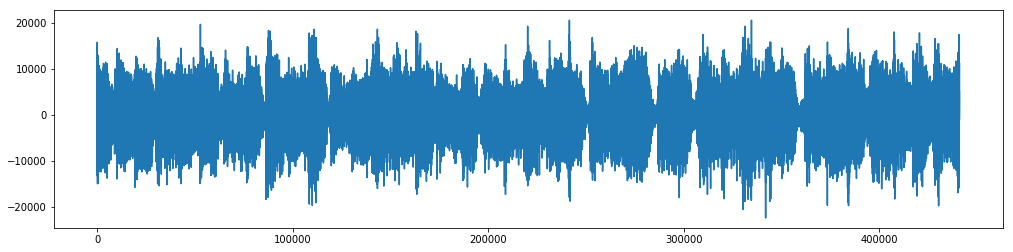

Instrumental Spectrogram/Phase:


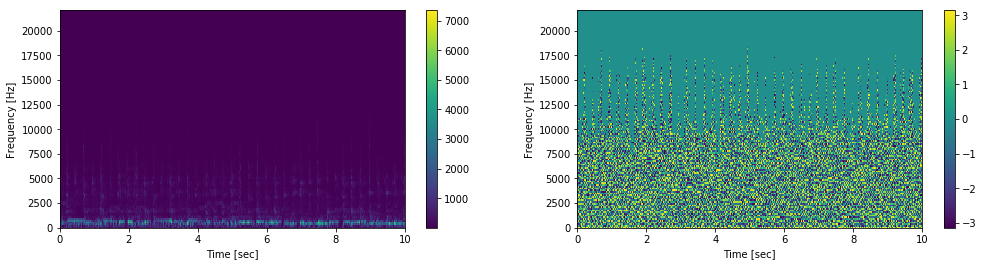

Electronic Wave:


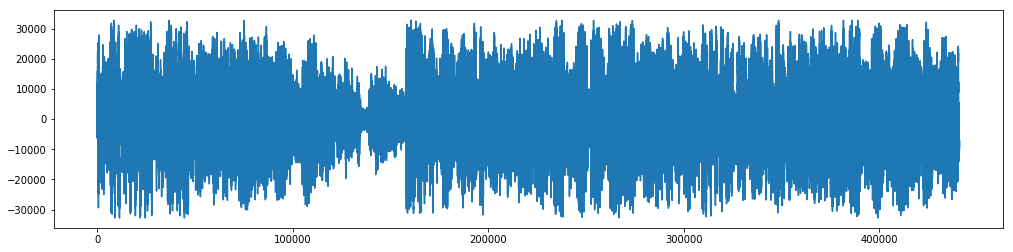

Electronic Spectrogram/Phase:


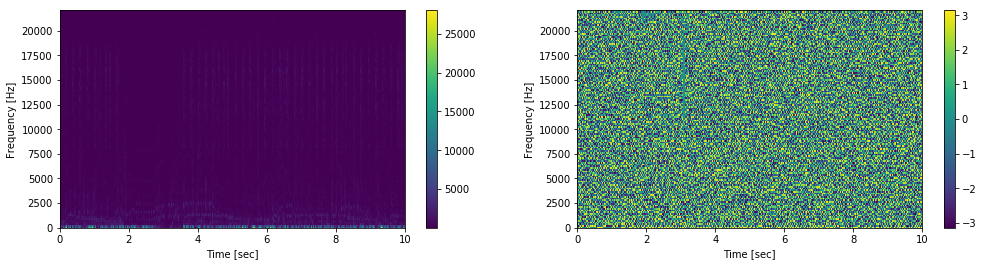

In [11]:
plt.rcParams['figure.figsize'] = (17, 4)

print("Instrumental Wave:")
plt.plot(inst_wav)
plt.show()
print("Instrumental Spectrogram/Phase:")
inst_amp = np.abs(inst_Zxx)
inst_phase = np.angle(inst_Zxx) 
# Note, filtering phase angle by amplitudes that are actually contributing for display purposes
signal_plots(inst_time,inst_freq,inst_amp, inst_phase * (inst_amp >= 1))

print("Electronic Wave:")
plt.plot(elec_wav)
plt.show()
print("Electronic Spectrogram/Phase:")
elec_amp = np.abs(elec_Zxx)
elec_phase = np.angle(elec_Zxx)
signal_plots(elec_time,elec_freq,elec_amp, elec_phase * (elec_amp >= 1))

# Invert STFT back into audio file

Now we will invert the stft back into an audio waveform that can be re-saved as an mp3

In [12]:
# Just using scipy to invert original audio
_, inst_reconstructed = sig.istft(inst_Zxx, inst_audio.frame_rate)
_, elec_reconstructed = sig.istft(elec_Zxx, elec_audio.frame_rate)

# Lets try a random transformation on the stft of one of the songs
transformed = elec_Zxx.conjugate() #this will do some funky stuff to phase
_, trans_reconstructed = sig.istft(transformed, elec_audio.frame_rate)

# The inversions may have changed the amplitude scale, re-normalize them to be close to the original amplitudes
mult = (inst_amp.max() - inst_amp.min()) / (inst_reconstructed.max() - inst_reconstructed.min())
inst_reconstructed = (inst_reconstructed * mult).astype(np.int16)

mult = (elec_amp.max() - elec_amp.min()) / (elec_reconstructed.max() - elec_reconstructed.min())
elec_reconstructed = (elec_reconstructed * mult).astype(np.int16)

mult = (elec_amp.max() - elec_amp.min()) / (trans_reconstructed.max() - trans_reconstructed.min())
trans_reconstructed = (trans_reconstructed * mult).astype(np.int16)

### Play-back original sample and inverted sample
They should be very similar

In [13]:
print("Original Instrumental")
ipd.display(ipd.Audio(inst_wav, rate=inst_audio.frame_rate))

print("Reconstructed Instrumental")
ipd.display(ipd.Audio(inst_reconstructed, rate=inst_audio.frame_rate))

print("Original Electronic")
ipd.display(ipd.Audio(elec_wav, rate=elec_audio.frame_rate))

print("Reconstructed Electronic")
ipd.display(ipd.Audio(elec_reconstructed, rate=elec_audio.frame_rate))

print("Transformed Electronic")
ipd.display(ipd.Audio(trans_reconstructed, rate=elec_audio.frame_rate))

Original Instrumental


Reconstructed Instrumental


Original Electronic


Reconstructed Electronic


Transformed Electronic


## Optional: Save new audio to file
Just using pydub again

In [14]:
# Instrumental
inst_out = AudioSegment(inst_reconstructed.tobytes(),frame_rate=inst_audio.frame_rate,sample_width=2,channels=1)
inst_out.export("instrumental.mp3",format='mp3')

elec_out = AudioSegment(elec_reconstructed.tobytes(),frame_rate=elec_audio.frame_rate,sample_width=2,channels=1)
elec_out.export("electronic.mp3",format='mp3')

<_io.BufferedRandom name='electronic.mp3'>

## Mel-scale Spectrogram

Mel-scale is an attempt to map the frequency spectrum of a signal to a scale that more accuratly represents how humans hear sound. In short people hear differences in lower frequencies easier than higher frequencies, so it seems likely that the 'discriminatory' part of musical signals are better represented in a mel-scale.

https://en.wikipedia.org/wiki/Mel_scale

In [72]:
# Conversion functions
# Note there are many different definitions of mel-scale, this is just the first one listed on the wiki page

def freq_to_mel(freq):
    return 1127*np.log(freq)

def mel_to_freq(mel):
    return 700*(np.exp(mel/1127) - 1)

## Mel-scale part is still in progress

Take a look here on how to actually do it, also a good discussion on machine learning audio processing in general:
https://timsainb.github.io/spectrograms-mfccs-and-inversion-in-python.html